<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/CNN/CNN_Data_augmentation_to_address_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Test whether the GPU is working or not

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_dir = '/content/drive/MyDrive/Colab/ANN/datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/daisy/162362896_99c7d851c8_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/daisy/154332674_453cea64f4.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/daisy/253426762_9793d43fcd.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/daisy/5794839_200acd910c_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/daisy/105806915_a9c13e2106_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

250


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/roses/145862135_ab710de93c_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/roses/537207677_f96a0507bb.jpg'),
 PosixPath('/content/drive/MyDrive/Colab/ANN/datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg')]

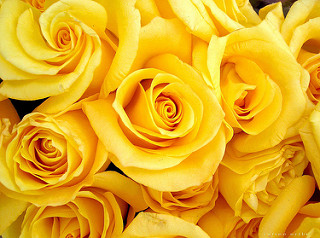

In [8]:
PIL.Image.open(str(roses[0]))

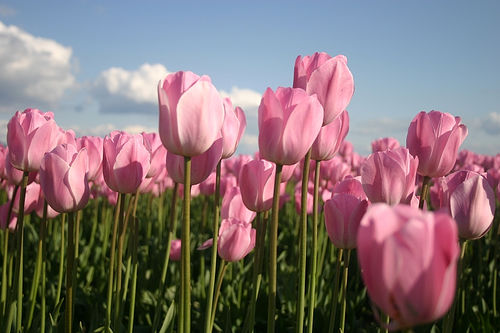

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [11]:
# Read flowers images from disk into numpy array using opencv
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(238, 320, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:

X = np.array(X)
y = np.array(y)

### Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
### Build convolutional neural network and train it
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
6/6 [==============================] - 32s 75ms/step - loss: 1.8803 - accuracy: 0.2353
Epoch 2/30
6/6 [==============================] - 0s 20ms/step - loss: 1.4788 - accuracy: 0.3316
Epoch 3/30
6/6 [==============================] - 0s 19ms/step - loss: 1.3169 - accuracy: 0.4492
Epoch 4/30
6/6 [==============================] - 0s 20ms/step - loss: 1.0351 - accuracy: 0.6257
Epoch 5/30
6/6 [==============================] - 0s 20ms/step - loss: 0.9309 - accuracy: 0.6684
Epoch 6/30
6/6 [==============================] - 0s 20ms/step - loss: 0.8205 - accuracy: 0.6845
Epoch 7/30
6/6 [==============================] - 0s 19ms/step - loss: 0.6419 - accuracy: 0.8128
Epoch 8/30
6/6 [==============================] - 0s 19ms/step - loss: 0.4715 - accuracy: 0.8770
Epoch 9/30
6/6 [==============================] - 0s 19ms/step - loss: 0.3548 - accuracy: 0.8930
Epoch 10/30
6/6 [==============================] - 0s 19ms/step - loss: 0.3266 - accuracy: 0.8877
Epoch 11/30
6/6 [===========

In [18]:

model.evaluate(X_test_scaled,y_test)

2/2 [==============================] - 0s 220ms/step - loss: 3.0116 - accuracy: 0.5873


[3.0115532875061035, 0.5873016119003296]

In [19]:
# Here we see that while train accuracy is very high (100%), 
# the test accuracy is significantly low (58%) indicating overfitting. 
# Let's make some predictions before we use data augmentation to address overfitting
predictions = model.predict(X_test_scaled)
predictions

array([[  3.1479907 ,  -0.38991275,  -1.50534   , -12.588858  ,
         -4.5456386 ],
       [  2.0950334 ,  -3.6058402 ,   4.658892  ,  -4.9314632 ,
         -2.6106212 ],
       [ -1.6982033 ,  10.2523575 ,  -3.1984208 , -12.076278  ,
        -15.555279  ],
       [ -6.927467  ,  -4.2817054 ,   3.618392  ,  -1.0768032 ,
         -3.8043497 ],
       [-10.94927   ,  -0.7113266 ,   5.534072  ,  -3.3456128 ,
         -6.306083  ],
       [ -3.3698604 ,  -1.0890714 ,  -0.67072743,   1.6794941 ,
         -9.102657  ],
       [  0.21692608, -10.066365  ,   2.3185887 ,   7.7499166 ,
         -7.704744  ],
       [ -0.40596426,   2.4016247 ,  -0.88957995,  -7.722361  ,
         -8.383835  ],
       [ -2.3782444 ,  -1.8924464 ,   0.30338266, -12.657792  ,
         -1.1375644 ],
       [ -0.05221226, -11.257155  ,  -1.5002869 ,  11.469962  ,
         -8.524414  ],
       [  4.922187  ,  -4.3746696 ,  -1.7000293 , -11.986418  ,
         -2.01279   ],
       [ 14.588429  , -23.385355  , -10.959

In [23]:
score = tf.nn.softmax(predictions[1])
np.argmax(score)

2

In [24]:
y_test[1]

2

In [25]:
# Improve Test Accuracy Using Data Augmentation
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

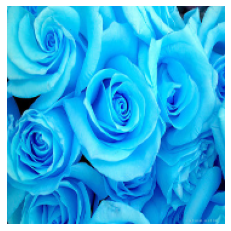

In [26]:
# Original Image
plt.axis('off')
plt.imshow(X[0])

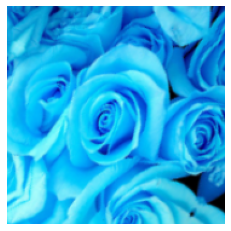

In [27]:
# Newly generated training sample using data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [28]:
# Train the model using data augmentation and a drop out layer

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
6/6 [==============================] - 1s 30ms/step - loss: 2.1428 - accuracy: 0.2193
Epoch 2/30
6/6 [==============================] - 0s 26ms/step - loss: 1.5692 - accuracy: 0.2513
Epoch 3/30
6/6 [==============================] - 0s 24ms/step - loss: 1.4757 - accuracy: 0.2781
Epoch 4/30
6/6 [==============================] - 0s 23ms/step - loss: 1.4388 - accuracy: 0.3797
Epoch 5/30
6/6 [==============================] - 0s 23ms/step - loss: 1.3189 - accuracy: 0.4332
Epoch 6/30
6/6 [==============================] - 0s 23ms/step - loss: 1.2437 - accuracy: 0.4866
Epoch 7/30
6/6 [==============================] - 0s 24ms/step - loss: 1.2010 - accuracy: 0.4973
Epoch 8/30
6/6 [==============================] - 0s 23ms/step - loss: 1.1686 - accuracy: 0.4492
Epoch 9/30
6/6 [==============================] - 0s 22ms/step - loss: 1.1155 - accuracy: 0.5508
Epoch 10/30
6/6 [==============================] - 0s 23ms/step - loss: 1.0663 - accuracy: 0.5561
Epoch 11/30
6/6 [============

In [29]:
model.evaluate(X_test_scaled,y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.9042 - accuracy: 0.6984


[0.9041802287101746, 0.6984127163887024]


## **You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**
